### PGBM - 001

(1, 320, 260)
[[[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  1  0  1]
  [ 0  0  0 ... 11  1  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]
--------------------------------------------------------------
# Header Information #
Image Size =  (260, 320, 1)
Pixel Spacing =  (0.6875, 0.6875, 6.5)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = 0/1547
Image mean & std = 288.12556490384617, 249.16496469224867
--------------------------------------------------------------
Original Pixel Spacing =  (0.6875, 0.6875, 6.5)
Processed Pixel Spacing =  (1.0, 1.0, 6.5)
Original Image Size =  (260, 320, 1)
Processed Image Size =  (179, 220, 1)


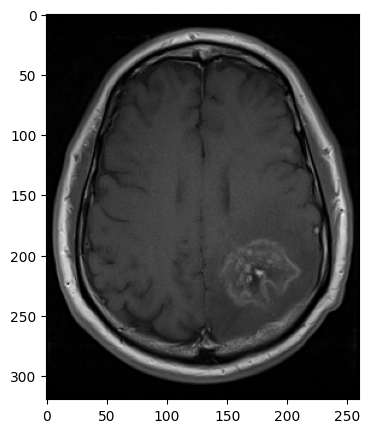

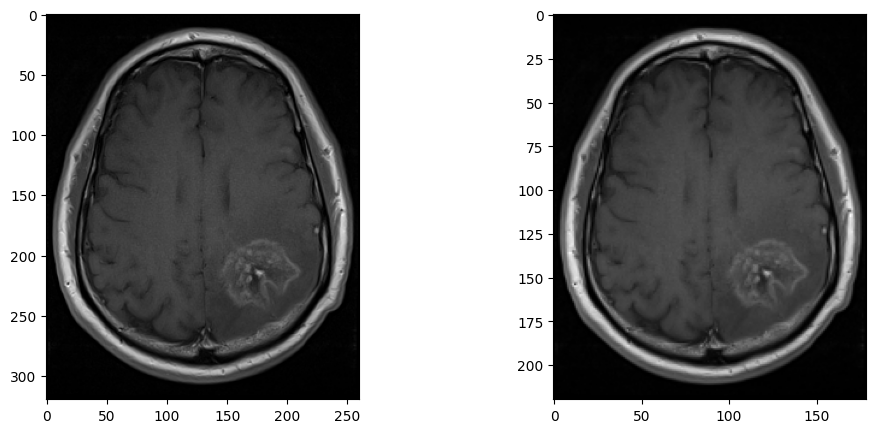

In [ ]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = '/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001/04-02-1992-FH-HEADBrain Protocols-79896/11.000000-T1post-80644/1-17.dcm'
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print('--------------------------------------------------------------')

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

print('--------------------------------------------------------------')

# Resample
def resample_array(sitk_image, spacing, interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [spacing, spacing, original_spacing[2]]
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in
                zip(original_size, original_spacing, new_spacing)]
    sitk_image = sitk.Resample(sitk_image, new_size, sitk.Transform(), interpolator, sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

resample_img = resample_array(image, 1)
print('Original Pixel Spacing = ', image.GetSpacing())
print('Processed Pixel Spacing = ', resample_img.GetSpacing())
print('Original Image Size = ', image.GetSize())
print('Processed Image Size = ', resample_img.GetSize())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_arr[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(resample_img)[0], cmap='gray')


(1, 320, 260)
[[[0 0 0 ... 0 0 0]
  [0 1 0 ... 1 1 1]
  [0 0 1 ... 6 1 0]
  ...
  [0 1 1 ... 2 1 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
--------------------------------------------------------------
# Header Information #
Image Size =  (260, 320, 1)
Pixel Spacing =  (0.6875, 0.6875, 6.5)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = 0/1482
Image mean & std = 255.33890625, 226.351069936291
--------------------------------------------------------------
Original Pixel Spacing =  (0.6875, 0.6875, 6.5)
Processed Pixel Spacing =  (1.0, 1.0, 6.5)
Original Image Size =  (260, 320, 1)
Processed Image Size =  (179, 220, 1)


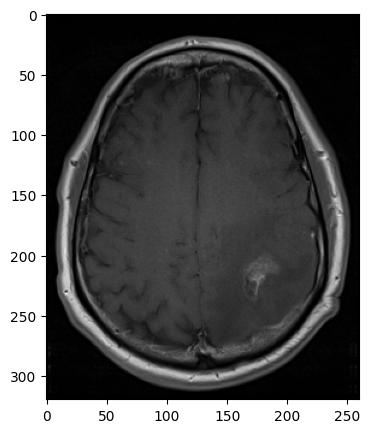

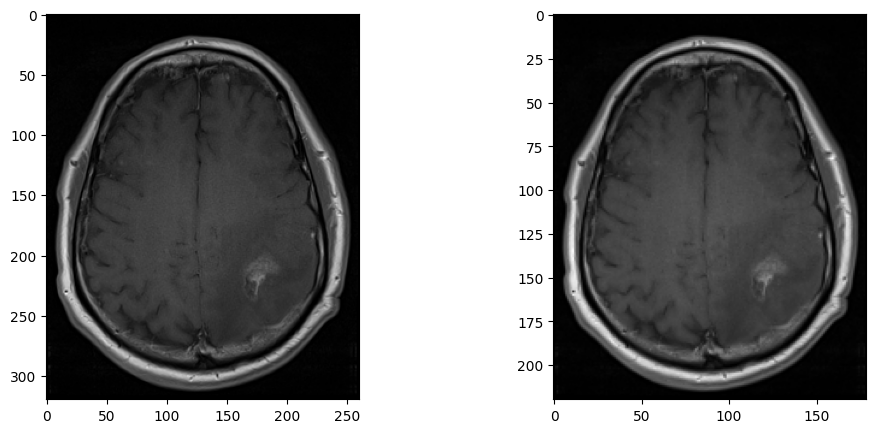

In [2]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = '/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-001/11-19-1991-FH-HEADBrain Protocols-40993/11.000000-T1post-03326/1-17.dcm'
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print('--------------------------------------------------------------')

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

print('--------------------------------------------------------------')

# Resample
def resample_array(sitk_image, spacing, interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [spacing, spacing, original_spacing[2]]
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in
                zip(original_size, original_spacing, new_spacing)]
    sitk_image = sitk.Resample(sitk_image, new_size, sitk.Transform(), interpolator, sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

resample_img = resample_array(image, 1)
print('Original Pixel Spacing = ', image.GetSpacing())
print('Processed Pixel Spacing = ', resample_img.GetSpacing())
print('Original Image Size = ', image.GetSize())
print('Processed Image Size = ', resample_img.GetSize())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_arr[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(resample_img)[0], cmap='gray')

### PGBM-002

(1, 512, 512)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
--------------------------------------------------------------
# Header Information #
Image Size =  (512, 512, 1)
Pixel Spacing =  (0.4297, 0.4297, 6.5)
Image Dimension =  3
Number of Pixel Components =  1
Minimum & Maximum pixel value(Min/Max) = 0/6024
Image mean & std = 753.1488609313965, 1001.365666788939
--------------------------------------------------------------
Original Pixel Spacing =  (0.4297, 0.4297, 6.5)
Processed Pixel Spacing =  (1.0, 1.0, 6.5)
Original Image Size =  (512, 512, 1)
Processed Image Size =  (220, 220, 1)


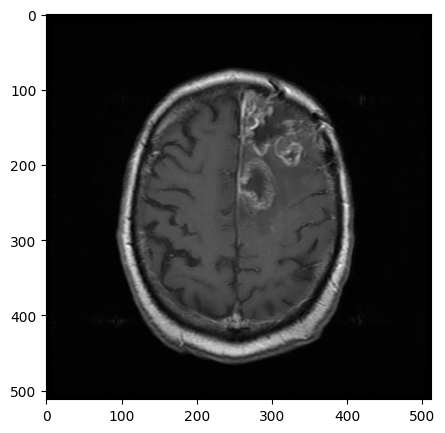

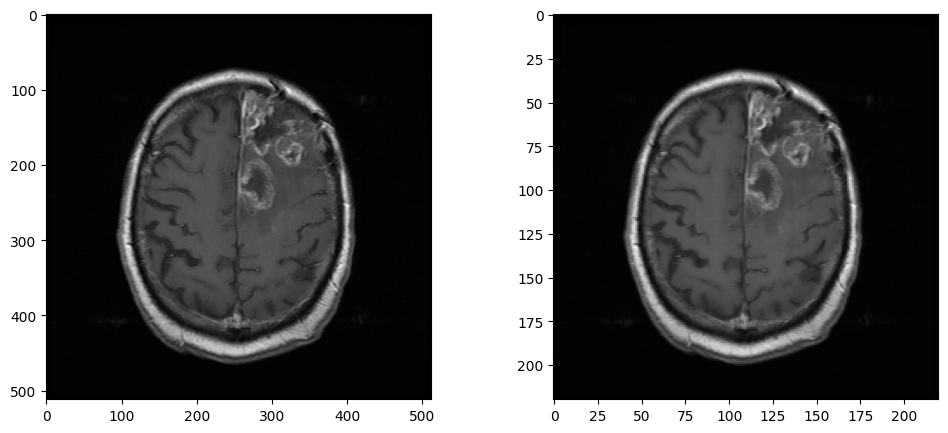

In [4]:
import numpy as np # 수치연산, 수학 라이브러리
import os # 파일 관리
import matplotlib # 수학적인 연산, 그래프 plottting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import SimpleITK as sitk # 의료영상용 라이브러리
import json
import csv
import pandas as pd
from sklearn import metrics as skmet
from skimage import morphology # 일반적인 영상처리
from skimage import measure
from skimage import exposure
from skimage.transform import rotate
from skimage import io as sio
from skimage import color as skc

test_data = '/mnt/ssd/brain-tumor-prediction/data/raw/Brain-Tumor-Progression/PGBM-002/01-17-1997-MR RCBV SEQUENCE-36058/12.000000-T1post-05670/1-17.dcm'
image = sitk.ReadImage(test_data)
img_arr = sitk.GetArrayFromImage(image)
print(img_arr.shape)
print(img_arr)

print('--------------------------------------------------------------')

print('# Header Information #')
print('Image Size = ', image.GetSize())  # 이미지 크기
print('Pixel Spacing = ', image.GetSpacing())  # 픽셀 거리
print('Image Dimension = ', image.GetDimension())  # 원래 지축(높이)까지해서 3차원
print('Number of Pixel Components = ', image.GetNumberOfComponentsPerPixel())  # 흑백이라 1
print('Minimum & Maximum pixel value(Min/Max) = {}/{}'.format(np.min(img_arr), np.max(img_arr)))
print('Image mean & std = {}, {}'.format(np.mean(img_arr), np.std(img_arr)))

plt.figure(figsize=(5,5))
plt.imshow(img_arr[0], cmap='gray')

print('--------------------------------------------------------------')

# Resample
def resample_array(sitk_image, spacing, interpolator=sitk.sitkLinear):
    original_spacing = sitk_image.GetSpacing()
    original_size = sitk_image.GetSize()
    new_spacing = [spacing, spacing, original_spacing[2]]
    new_size = [int(round(osz * ospc / nspc)) for osz, ospc, nspc in
                zip(original_size, original_spacing, new_spacing)]
    sitk_image = sitk.Resample(sitk_image, new_size, sitk.Transform(), interpolator, sitk_image.GetOrigin(), new_spacing,
                         sitk_image.GetDirection(), 0, sitk_image.GetPixelID())
    return sitk_image

resample_img = resample_array(image, 1)
print('Original Pixel Spacing = ', image.GetSpacing())
print('Processed Pixel Spacing = ', resample_img.GetSpacing())
print('Original Image Size = ', image.GetSize())
print('Processed Image Size = ', resample_img.GetSize())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_arr[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(resample_img)[0], cmap='gray')